# Imports

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

raw_train = pd.read_csv("train.csv")
raw_test = pd.read_csv("test.csv")

raw_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Preprocessing

In [3]:
def transform(data):
  pclass1 = data['Pclass'].map({1:1,2:0,3:0})
  pclass2 = data['Pclass'].map({1:0,2:1,3:0})
  titles = ["Mr", "Miss", "Mrs", "Master"]
  title = data['Name'].str.extract(r"([A-Za-z]+)\.", expand=False)
  title.replace(["Ms", "Mlle", "Mme"], "Miss", inplace=True)
  title.replace(["Lady"], "Mrs", inplace=True)
  title.replace(["Sir", "Rev"], "Mr", inplace=True)
  title[~title.isin(titles)] = "Others"
  title1 = title.map({'Mr':1,'Miss':0,'Mrs':0,'Master':0,'Others':0,np.nan:0})
  title2 = title.map({'Mr':0,'Miss':1,'Mrs':0,'Master':0,'Others':0,np.nan:0})
  title3 = title.map({'Mr':0,'Miss':0,'Mrs':1,'Master':0,'Others':0,np.nan:0})
  title4 = title.map({'Mr':0,'Miss':0,'Mrs':0,'Master':1,'Others':0,np.nan:0})
  sex = data['Sex'].map({'male':0,'female':1,np.nan:0})
  age = data['Age'].fillna(data['Age'].mean())
  family = data['SibSp'] + data['Parch']
  fare = data['Fare'].fillna(0)
  embarkedS = data['Embarked'].map({'S':1,'C':0,'Q':0,np.nan:1})
  embarkedC = data['Embarked'].map({'S':0,'C':1,'Q':0,np.nan:0})
  cleaned = pd.DataFrame({'Pclass1':pclass1,'Pclass2':pclass2,'Title1':title1,'Title2':title2,'Title3':title3,'Title4':title4,'Sex':sex,'Age':age,'Family':family,'Fare':fare,'EmbarkedS':embarkedS,'EmbarkedC':embarkedC})
  sc = StandardScaler();
  standardized = sc.fit_transform(cleaned)
  return standardized

transform(raw_train)

array([[-0.56568542, -0.51015154,  0.83688809, ..., -0.50244517,
         0.61583843, -0.48204268],
       [ 1.76776695, -0.51015154, -1.19490289, ...,  0.78684529,
        -1.62380254,  2.0745051 ],
       [-0.56568542, -0.51015154, -1.19490289, ..., -0.48885426,
         0.61583843, -0.48204268],
       ...,
       [-0.56568542, -0.51015154, -1.19490289, ..., -0.17626324,
         0.61583843, -0.48204268],
       [ 1.76776695, -0.51015154,  0.83688809, ..., -0.04438104,
        -1.62380254,  2.0745051 ],
       [-0.56568542, -0.51015154,  0.83688809, ..., -0.49237783,
        -1.62380254, -0.48204268]])

In [4]:
def transform_target(data):
    return data['Survived'].map({0:-1,1:1}).to_numpy();

transform_target(raw_train)

array([-1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1, -1, -1,  1, -1,
        1, -1,  1, -1,  1,  1,  1, -1,  1, -1, -1,  1, -1, -1,  1,  1, -1,
       -1, -1,  1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1,  1, -1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1, -1, -1,  1, -1, -1, -1,  1,  1, -1,
        1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1, -1,  1,  1, -1,  1,
        1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1,
       -1, -1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1,  1, -1,  1,  1, -1, -1, -1, -1,  1, -1, -1,
        1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,
       -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  1,
        1, -1, -1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1, -1, -1,
        1, -1, -1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1, -1,  1, -1,  1,
       -1, -1, -1,  1, -1

# Training

In [5]:
def train_model(data,target,n,lr):
  weights = np.ones(len(data))
  model = [];
  for i in range(n):
    svm = LinearSVC()
    svm.fit(data,target,sample_weight=weights/weights.sum())
    model += [(svm,svm.score(data,target))]
    output = np.zeros(len(data))
    for m,a in model:
      output += a * m.predict(data)
    output = np.array([1 if x > 0 else -1 for x in output])
    errors = ((output - target)/2)**2
    weights += errors * lr

  return model

# Evaluation

In [6]:
def test_errors(data,target,n,lr):
  weights = np.ones(len(data))
  model = [];
  ret = []
  for i in range(n):
    svm = LinearSVC()
    svm.fit(data,target,sample_weight= weights/weights.sum())
    model += [(svm,svm.score(data,target))]
    output = np.zeros(len(data))
    for m,a in model:
      output += a * m.predict(data)
    output = np.array([1 if x > 0 else -1 for x in output])
    errors = ((output - target)/2)**2
    weights += errors * lr
    ret += [errors.mean()]
  return ret

<Axes: >

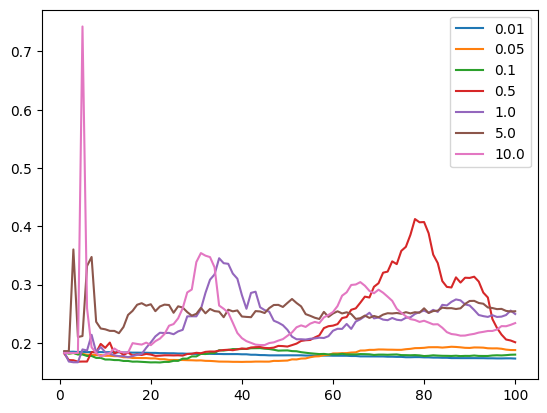

In [7]:
num_iters = 20
lrs = [.01, .05, .1, .5, 1, 5, 10]
errors = []
train = transform(raw_train)
target = transform_target(raw_train)
for lr in lrs:
  error = np.zeros(100)
  for i in range(num_iters):
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(train,target, test_size=.2)
    error += test_errors(Xtrain,Ytrain,100,lr)
  error /= num_iters
  errors += [error]
pd.DataFrame(data=errors,index=lrs,columns=[i for i in range(1,101)]).T.plot.line()


<Axes: >

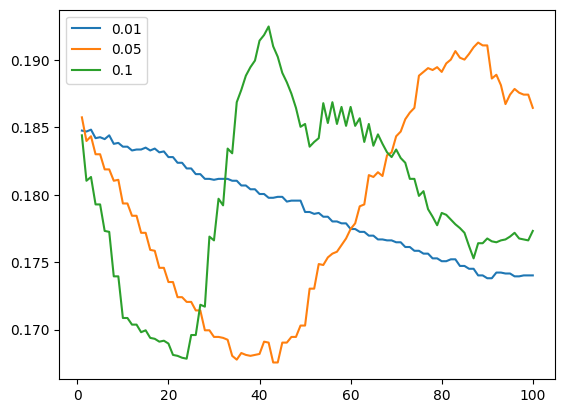

In [8]:
num_iters = 20
lrs = [.01, .05, .1]
errors = []
train = transform(raw_train)
target = transform_target(raw_train)
for lr in lrs:
  error = np.zeros(100)
  for i in range(num_iters):
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(train,target, test_size=.2)
    error += test_errors(Xtrain,Ytrain,100,lr)
  error /= num_iters
  errors += [error]
pd.DataFrame(data=errors,index=lrs,columns=[i for i in range(1,101)]).T.plot.line()

In [9]:
def val_errors(train_data,train_target,val_data,val_target,n,lr):
  weights = np.ones(len(train_data))
  model = [];
  ret = []
  for i in range(n):
    svm = LinearSVC()
    svm.fit(train_data,train_target,sample_weight= weights/weights.sum())
    model += [(svm,svm.score(train_data,train_target))]
    output = np.zeros(len(train_data))
    for m,a in model:
      output += a * m.predict(train_data)
    output = np.array([1 if x > 0 else -1 for x in output])
    errors = ((output - train_target)/2)**2
    weights += errors * lr

    output = np.zeros(len(val_data))
    for m,a in model:
      output += a * m.predict(val_data)
    output = np.array([1 if x > 0 else -1 for x in output])
    errors = ((output - val_target)/2)**2
    ret += [errors.mean()]
  return ret

<Axes: >

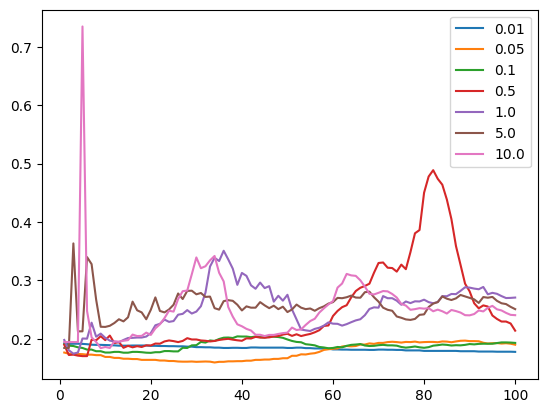

In [10]:
num_iters = 20
lrs = [.01, .05, .1, .5, 1, 5, 10]
errors = []
train = transform(raw_train)
target = transform_target(raw_train)
for lr in lrs:
  error = np.zeros(100)
  for i in range(num_iters):
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(train,target, test_size=.2)
    error += val_errors(Xtrain,Ytrain,Xtest,Ytest,100,lr)
  error /= num_iters
  errors += [error]
pd.DataFrame(data=errors,index=lrs,columns=[i for i in range(1,101)]).T.plot.line()

<Axes: >

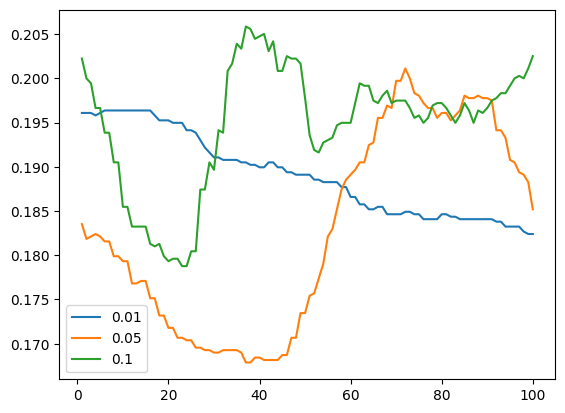

In [11]:
num_iters = 20
lrs = [.01, .05, .1]
errors = []
train = transform(raw_train)
target = transform_target(raw_train)
for lr in lrs:
  error = np.zeros(100)
  for i in range(num_iters):
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(train,target, test_size=.2)
    error += val_errors(Xtrain,Ytrain,Xtest,Ytest,100,lr)
  error /= num_iters
  errors += [error]
pd.DataFrame(data=errors,index=lrs,columns=[i for i in range(1,101)]).T.plot.line()

<Axes: >

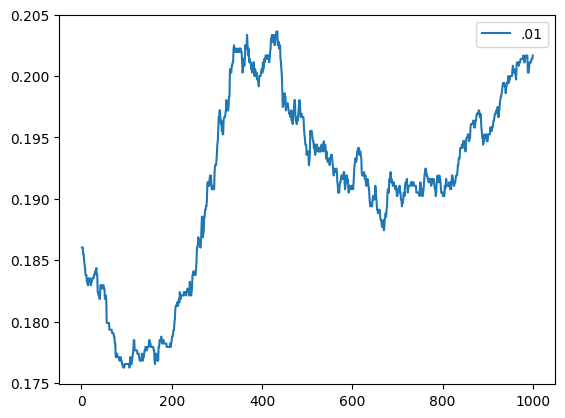

In [9]:
num_iters = 20
train = transform(raw_train)
target = transform_target(raw_train)
errors = np.zeros(1000)
for i in range(num_iters):
  Xtrain, Xtest, Ytrain, Ytest = train_test_split(train,target, test_size=.2)
  errors += val_errors(Xtrain,Ytrain,Xtest,Ytest,1000,.01)
errors /= num_iters
pd.DataFrame(data=errors,index=[i for i in range(1,1001)],columns=['.01']).plot.line()

In [14]:
num_iters = 20
train = transform(raw_train)
target = transform_target(raw_train)
errors = np.zeros(60)
for i in range(num_iters):
  Xtrain, Xtest, Ytrain, Ytest = train_test_split(train,target, test_size=.2)
  errors += val_errors(Xtrain,Ytrain,Xtest,Ytest,60,.05)
errors /= num_iters
result = pd.DataFrame(data=errors,index=[i for i in range(1,61)],columns=['.05'])
print(result.idxmin())

.05    32
dtype: int64


<Axes: >

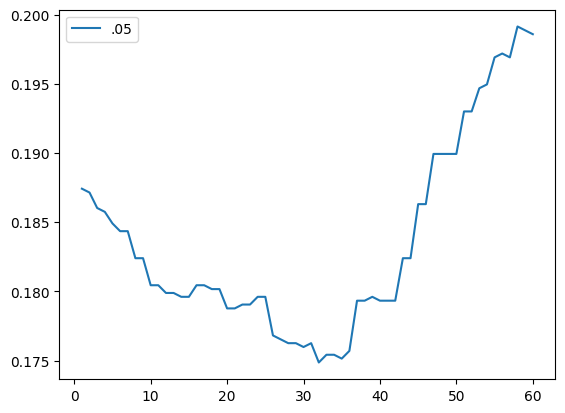

In [15]:
result.plot.line()

# Prediction

In [16]:
def predict(data,model):
  output = np.zeros(len(data))
  for m,a in model:
    output += a * m.predict(data)
  output = np.array([1 if x > 0 else 0 for x in output])
  return output

In [17]:
model = train_model(transform(raw_train),transform_target(raw_train),30,.05)
output = predict(transform(raw_test),model)
output

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [18]:
out = pd.DataFrame({'PassengerId':raw_test['PassengerId'],'Survived':output})
out.to_csv('AdaBoostSVM.csv', index=False)
out

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
